![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# Document Layout Analyze
## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.12"

In [2]:
# install from PYPI using secret
#%pip install spark-ocr==$version --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

## Initialize Spark Session

In [3]:
from pyspark.sql import SparkSession
from sparkocr import start
import os

if license:
    os.environ['SPARK_OCR_LICENSE'] = license

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark

Spark version: 3.4.1
Spark NLP version: 5.1.2
Spark OCR version: 5.1.0



In [4]:
import pkg_resources

from pyspark.ml import PipelineModel
import pyspark.sql.functions as f

from sparkocr import start
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *
from sparkocr.metrics import score

## Read images and display it


    Image #0:
    Origin: file:/home/jose/spark-ocr/workshop/jupyter/layouts.png
    Resolution: 72 dpi
    Width: 2330 px
    Height: 3068 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


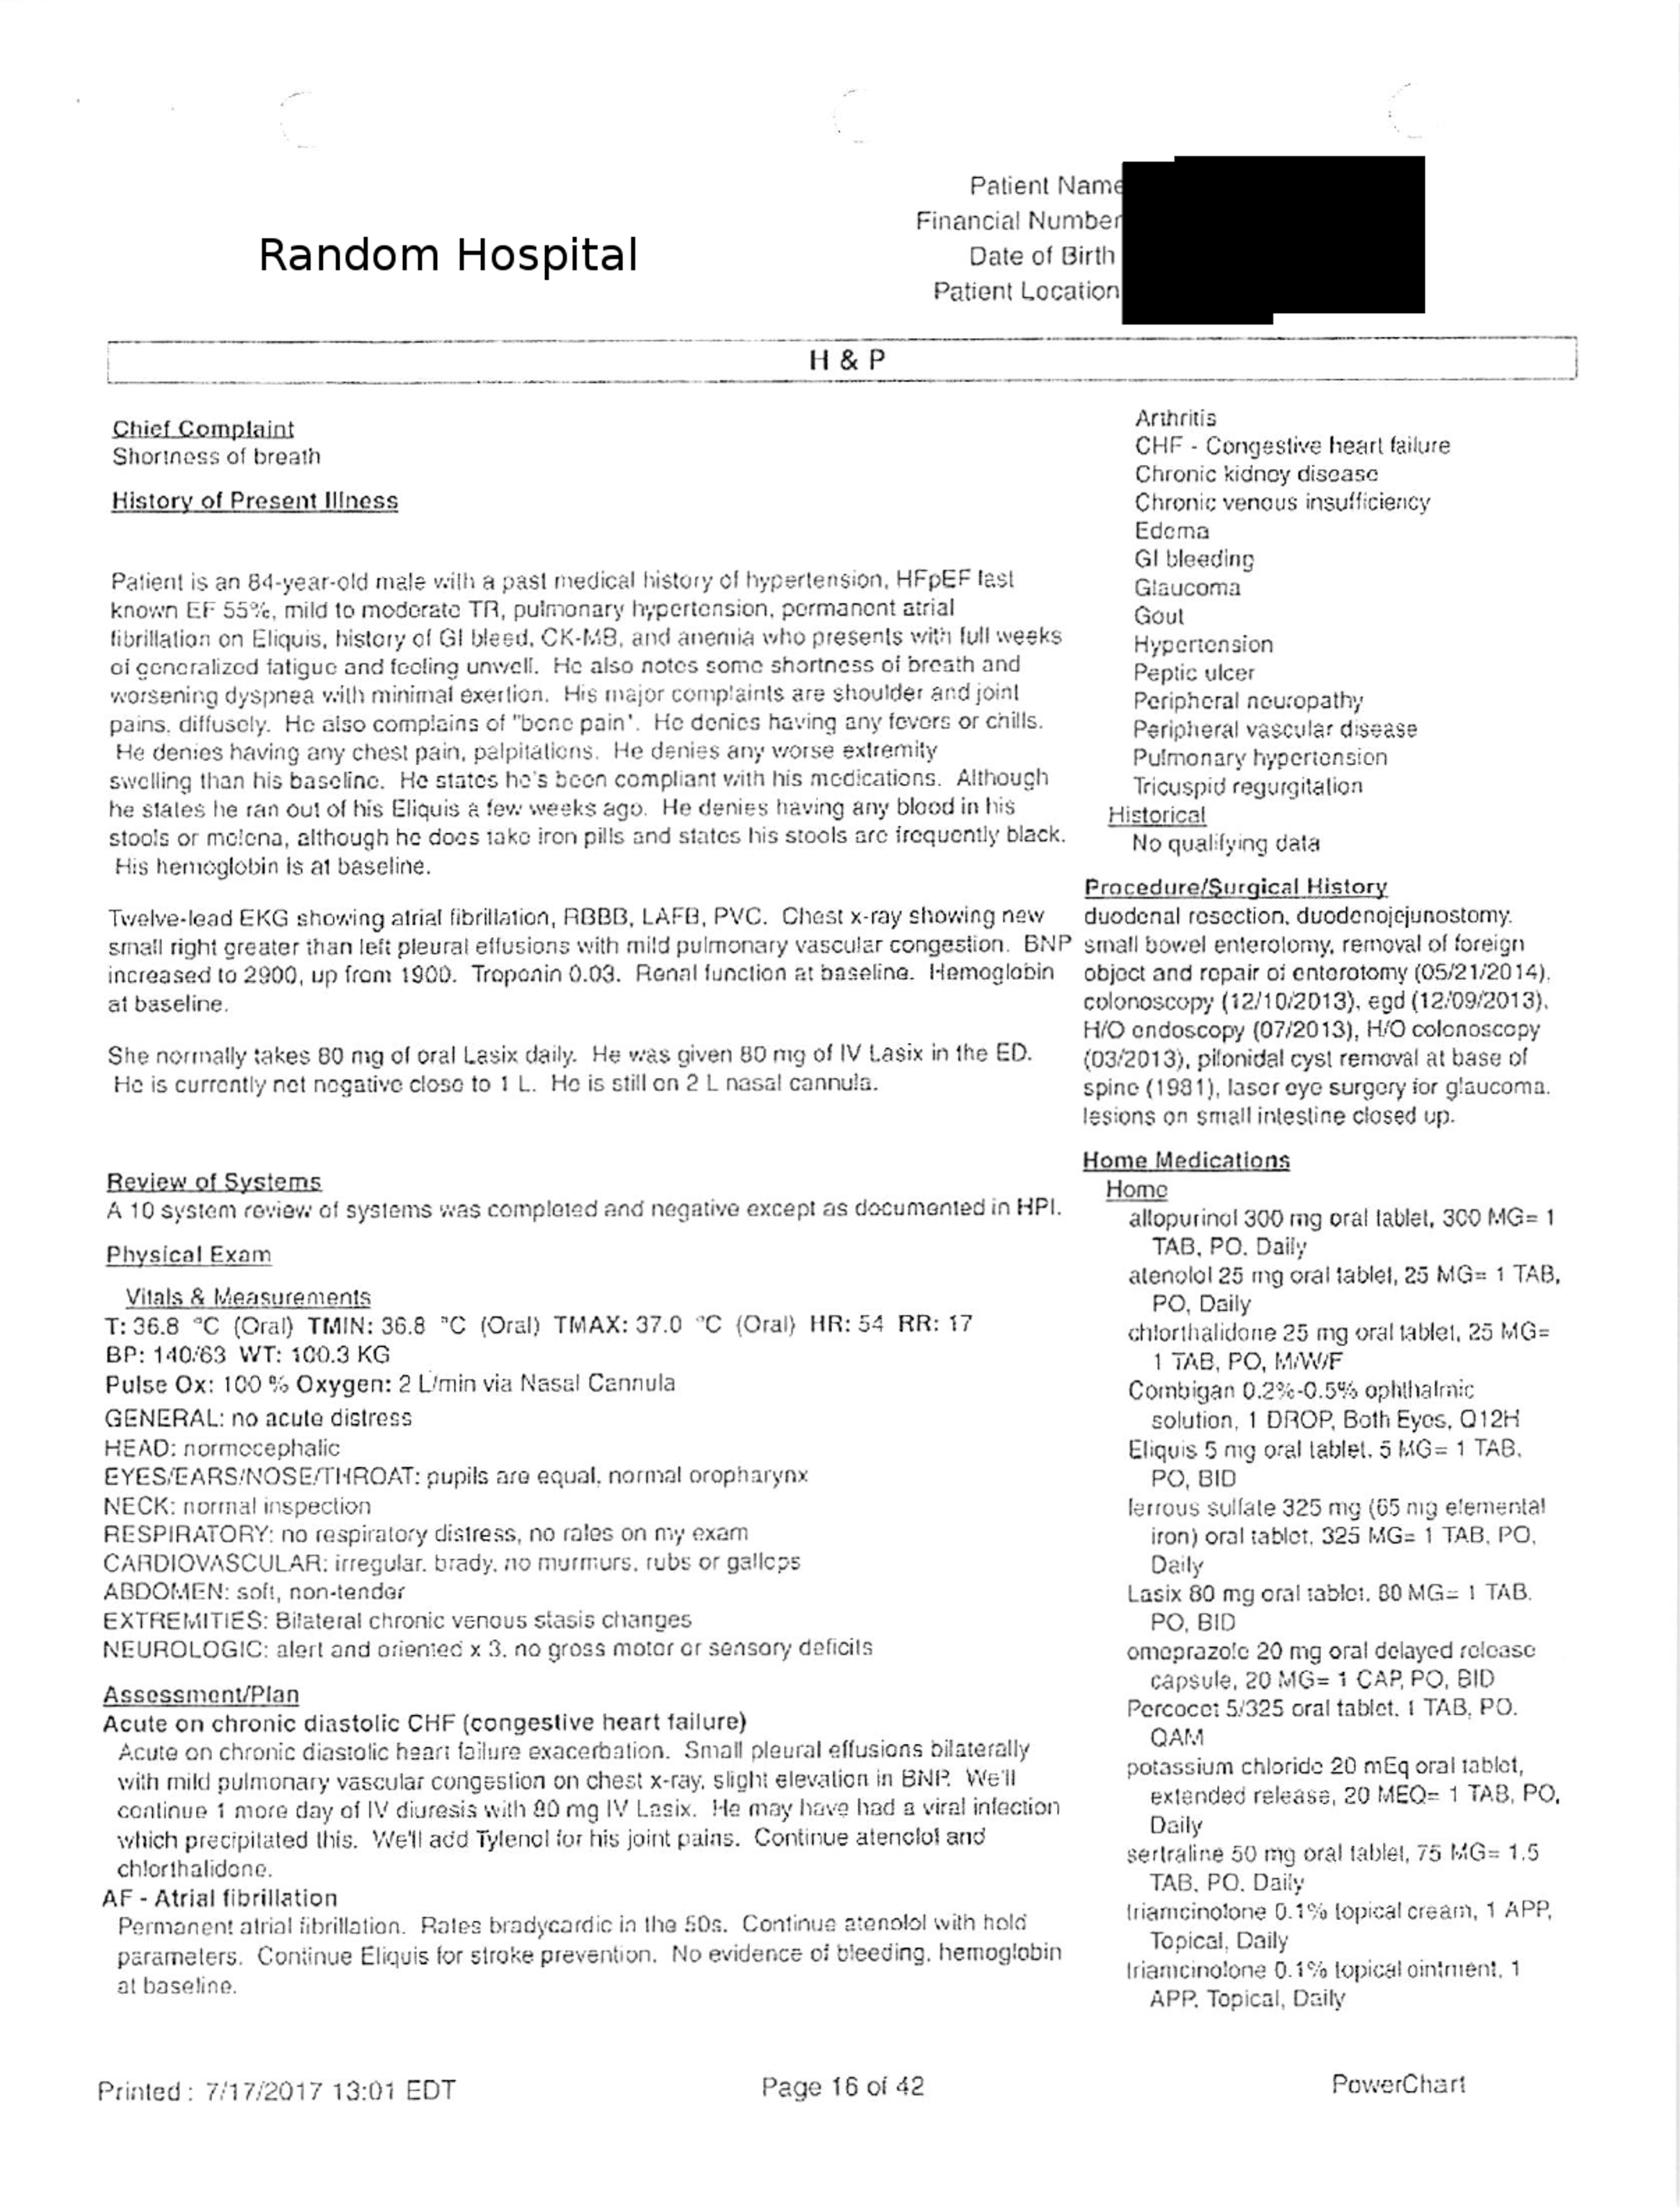

In [16]:
from pyspark.ml import PipelineModel
import pyspark.sql.functions as f
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import display_images

imagePath = "./layouts.png"
image_df = spark.read.format("binaryFile").load(imagePath)
display_images(BinaryToImage().transform(image_df), "image")

## Load Pipeline


In [8]:
binary_to_image = BinaryToImage()
binary_to_image.setImageType(ImageType.TYPE_3BYTE_BGR)

dit_layout = DocumentLayoutAnalyzer \
    .pretrained("publaynet_dit_base_mrcnn_jsl", "en", "clinical/ocr") \
    .setInputCol("image") \
    .setOutputCol("regions") \
    .setScoreThreshold(0.5)

draw_regions = ImageDrawRegions() \
    .setInputCol("image") \
    .setInputRegionsCol("regions") \
    .setOutputCol("image_with_regions") \
    .setRectColor(Color.green)

pipeline = PipelineModel(stages=[
    binary_to_image,
    dit_layout,
    draw_regions
])

publaynet_dit_base_mrcnn_jsl download started this may take some time.
Approximate size to download 401.1 MB


## Call the pipeline


    Image #0:
    Origin: file:/home/jose/spark-ocr/workshop/jupyter/layouts.png
    Resolution: 0 dpi
    Width: 2330 px
    Height: 3068 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


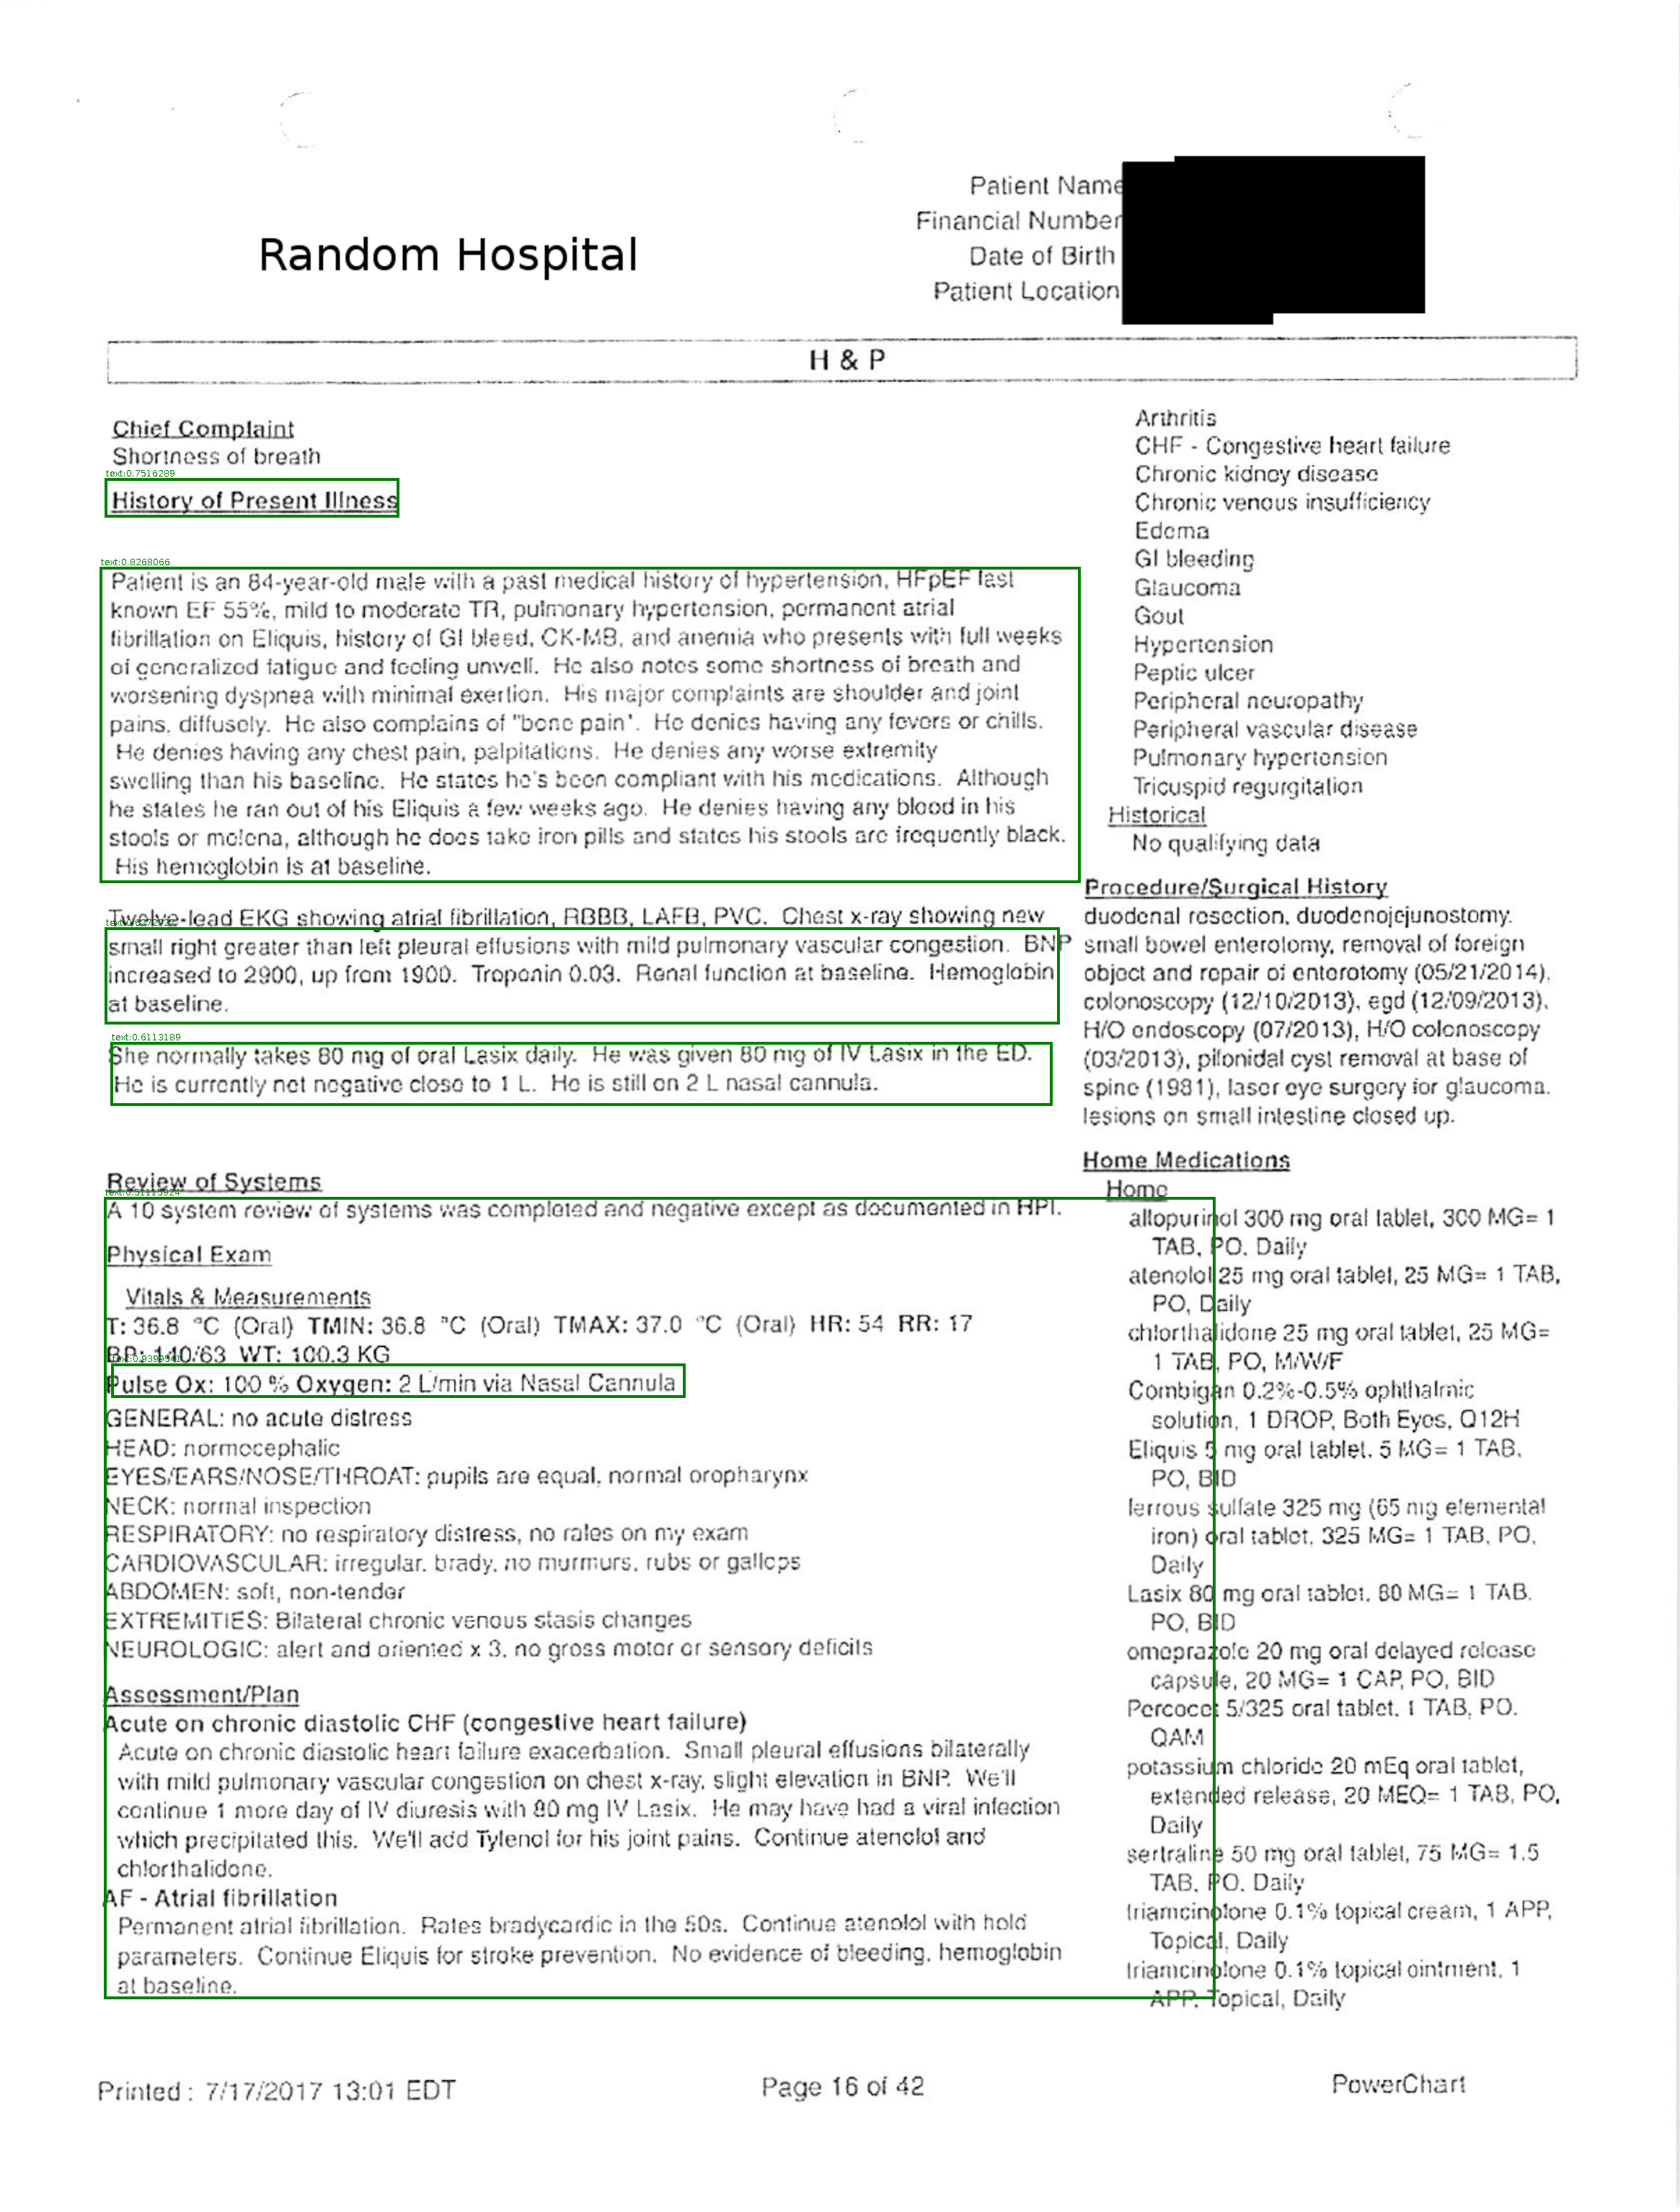

In [17]:
result = pipeline.transform(image_df).cache()
display_images(result, "image_with_regions")